|Name|SNR|ANR|
|----|---|----|
|Alexander Mistillioglou|2062448|u360743|
|Caio Soares|2065131|u245285|


# Introduction

Every facet of life has been upended since the first Covid case has been identified in Wuhan, China. The ensuing measures to fight the pandemic deeply impacted society in several ways, either at an individual level or at an economic or political one. The implications of the pandemic to the political sphere are particularly interesting and important. They are interesting because different politicians and countries responded to the disease in different ways, ranging from denial of the need for action to adherence to the epidemiologists' recomendations or even the paradox of complete inaction after the recommendation of epidemiologists in order to achieve herd immunity. They are important because the response governments had to the pandemic had a myriad of consequences in public health, the economy and the political arena. The latter is of utmost importance in democracies as politicians are held accountable for their actions and in our case the pandemic related policies they adopt. In this paper we will attempt to identify this impact and we will use the case of Brazil, as it is one of the most severely affected countries and it recently had elections, which will help us assess the impact of covid in politics.

In Brazil, the lack of coordination between the Federal government, which downplayed the severity of the pandemic and dragged its feet when it came to fighting it, and State governments, which in general took a more proactive instance regarding it, hindered the country's response to the pandemic. Brazilian President Jair Bolsonaro's statements against social distancing measures increased political polarization and incentivized unsafe behaviour in part of the Brazilian population. Also the fact that the country has high levels of inequality and poverty incresed the disease's impact (Ponce, 2020). 

While the most of responsibility for fighting the pandemic lies on the Federal level, municipalities have an important role in it as well. Under the Brazilian Unified Health System (SUS), they receive funding from the federal government and are responsible for managing public health care facilities. Mayors also have the power to take discretionary measures to deal with the pandemic, such as putting a lockdown in place and public awareness campaings.

In this project we will attempt to answer the following question: **"Does the effectiveness of a municipal goverment's response to Covid influences its election outcomes?".**

The rest of this document is organised as follows. In Section 2 we discuss the motivation for our question with a brief literature review. Section 3 describes the model that will be used. Sections 4 and 5 go through the data used. Section 6 describes our results and Section 7 briefly concludes.

# Motivation

Literature on blame attribution and natural disasters find that voters may or may not punish incumbent politicians, depending on the circumstances.

In a context of floods, Arceneaux and Stein (2006) find that voters can blame politicians for natural disasters, provided they perceive that incumbents could have done more to cushion the blow. Factors like a person's level of political knowledge and the impact of the flood on their life affect their voting behaviour. Individuals may also attribute blame to the government, but spare mayors if their blame is directed towards national or state levels.

Bodet, Melanee and Tessier (2016) find that voters in Calgary (Canada) affected by floods did not assign blame to the incumbent mayor, or if they did it wasn't necessarily negative. This indicates that voters may be unable or unwilling to hold incumbent politicians accountable.

There is evidence of blame attribution from Brazil as well, altough not in the context of natural disasters. Ferraz and Finan (2008) find that federal audits that resulted in the uncovering of corruption in municipalities had a significant impact in incumbents electoral performance. Ferraz and Finan (2011) also found that in municipalities where mayors are facing reelections corruption levels are significantly lower, indicating that politicians believe they can be punished by voters for bad behaviour.

On the other side, we may see the 'Rally Around the Flag' effect, that will assist the incumbents maintain their support or even increase it. Baum (2002) found that foreign policy shocks can increase support for presidents, but not in a homogenous fashion. Political and economic characteristics determine whether different groups will rally around the incumbent, namely partisanship and political sophistication. Regarding support for incumbent and Covid, evidence from France (Giommoni and Loumeau, 2020) and Italy (De Vries, et al, 2020) suggests that the adoption of lockdown measures increases support for incumbents.

# Method

To answer our question we will make use of the first round of municipal elections held in Brazil on November 15<sup>th</sup>. Our variable of interest is the difference in vote share between first rounds of the 2020 and 2016 municipal elections. Since Brazil electoral rules limit the number of consecutive terms of all levels of the executive branch to two, all mayors in our sample have been sworn in on January 2017 and served their terms to completion.

The change in vote share is calculated as follows:

$$\Delta vote_{i} = ln(vote.share_{2020, i}) - ln(vote.share_{2016, i})$$

Where *vote.share<sub>t,i</sub>* is the share of votes of the mayor of city *i* in year *t* election cycle.

For Covid response we will use the death rate from SARS-Covid. In order to make cities comparable, we will calculate the average weekly death rate, counting from the first death until one day before the election. This makes cities in which the pandemic started at different points in time comparable.

Our model will then be:

$$\Delta vote = covid + controls$$

Our controls will be a city's Human Development Index (HDI), share of voters over 60 years old and ideology of the incumbent mayor. HDI ranks cities based on health (life expectancy), income and education. The variable ideology comes from a 2017 survey in which members of parliament ranked parties from 1 to 10, with 1 being far-left and 10 far-right.

# Data

For our model we used publicly available data for election results, SARS-Covid deaths, and for our controls: Human Development Index (HDI), share of voter aged 60 or more and ideology of incumbent's party. Election results data and voter demographics were obtained from the [Brazilian Superior Electoral Court](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais). Covid data can be found at [Brazilian Health Ministry](https://opendatasus.saude.gov.br/dataset/bd-srag-2020). Population data at [Brazilian Institute of Geography and Statistics](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados ). HDI at [United Nations Procurement Division](https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html). Political orientation data can be found at [Brazilian Legislative Surveys](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ARYBJI).

The following packages will be used:

In [19]:
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
!pip install geopandas
import geopandas as gpd
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col


     |████████████████████████████████| 1.0 MB 11.9 MB/s 
     |████████████████████████████████| 6.3 MB 62.3 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


## Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

# Election results data

elec16 = pd.read_csv('/content/drive/MyDrive/Applied economic analysis/votacao_candidato_munzona_2016_BRASIL.csv', sep = ';', encoding = 'iso-8859-1')

elec20 = pd.read_csv('/content/drive/MyDrive/Applied economic analysis/votacao_candidato_munzona_2020_BRASIL.csv', sep = ';', encoding = 'iso-8859-1')

# Demographics

demo20 = pd.read_csv('/content/drive/MyDrive/Applied economic analysis/perfil_eleitorado_2020.csv', sep = ';', encoding = 'iso-8859-1')

# Covid data

covid = pd.read_csv('/content/drive/MyDrive/Applied economic analysis/INFLUD-04-01-2021.csv', sep = ';', encoding = 'iso-8859-1')

# HDI

url = 'https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html'

table = pd.read_html(url)

hdi = table[0]

# Population per municipality

pop = pd.read_excel('/content/drive/MyDrive/Applied economic analysis/POP2020_20201030.xls', sheet_name = 1, header = 1)

# Political party ideology

ideol = pd.read_csv('/content/drive/MyDrive/Applied economic analysis/BLS8_Data.csv')

# Define function to remove diacritics

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleanup

In [6]:
# In order to make our datasets comparable, we need to make transformations so that we have a column with the values "city (state)". They should be all lower case and without diacritics

# Election data

# Add state to city variable

elec16.NM_MUNICIPIO = elec16.NM_MUNICIPIO + ' (' + elec16.SG_UF + ')'
elec20.NM_MUNICIPIO = elec20.NM_MUNICIPIO + ' (' + elec20.SG_UF + ')'

# Make it lower string 

elec16.NM_MUNICIPIO = elec16['NM_MUNICIPIO'].str.lower()
elec20.NM_MUNICIPIO = elec20['NM_MUNICIPIO'].str.lower()

# Remove diacritics

elec16.NM_MUNICIPIO = elec16['NM_MUNICIPIO'].apply(strip_accents)
elec20.NM_MUNICIPIO = elec20['NM_MUNICIPIO'].apply(strip_accents)

# Demographics

demo20.NM_MUNICIPIO = demo20.NM_MUNICIPIO + ' (' + demo20.SG_UF + ')'
demo20.NM_MUNICIPIO = demo20['NM_MUNICIPIO'].str.lower()
demo20.NM_MUNICIPIO = demo20['NM_MUNICIPIO'].apply(strip_accents)

demo20 = demo20.loc[demo20['CD_FAIXA_ETARIA'] != -3]

# Covid

covid.ID_MN_RESI = covid.ID_MN_RESI + ' (' + covid.SG_UF + ')'
covid['ID_MN_RESI'] = covid['ID_MN_RESI'].str.lower()

# HDI

hdi['Município'] = hdi['Município'].str.lower()
hdi['Município'] = hdi['Município'].apply(strip_accents)

# Population dataframe

pop.dropna(inplace = True)

# Some values for population have footnotes, resulting in strings instead of floats. We will replace them with the proper values

pop.iloc[16, 4] = 539354

pop.iloc[110, 4] = 33049

pop.iloc[123, 4] = 25865

pop.iloc[134, 4] = 16130

pop.iloc[210, 4] = 7590

pop.iloc[579, 4] = 123747

pop.iloc[1205, 4] = 103672

pop.iloc[1526, 4] = 12170

pop.iloc[1937, 4] = 15717

pop.iloc[1973, 4] = 9031

pop.iloc[2159, 4] = 9442

pop.iloc[2237, 4] = 43712

# Converting population column to float

pop['POPULAÇÃO ESTIMADA'] = pop['POPULAÇÃO ESTIMADA'].astype(float)

# Converting city name column to lower string and removing diacritics

pop['NOME DO MUNICÍPIO'] = pop['NOME DO MUNICÍPIO'] + ' (' + pop['UF'] + ')'
pop['NOME DO MUNICÍPIO'] = pop['NOME DO MUNICÍPIO'].str.lower()
pop['NOME DO MUNICÍPIO'] = pop['NOME DO MUNICÍPIO'].apply(strip_accents)

# Selecting the most recent political orientation (2017)

ideol = ideol.loc[ideol['wave'] == 2017]


## Selecting Our Variables of Interest

### Filtering Incumbents

In [7]:
# Subsetting our sample out of the data

# Subsetting mayoral elections

elec16 = elec16.loc[elec16['DS_CARGO'] == 'Prefeito']
elec20 = elec20.loc[elec20['DS_CARGO'] == 'Prefeito']

# Subsetting elected mayors in 2016 election

elec16_mayors = elec16.loc[elec16['DS_SIT_TOT_TURNO'] == 'ELEITO']

# Filtering incumbent mayors running in 2020

incum20 = elec20[elec20['NM_CANDIDATO'].isin(elec16_mayors['NM_CANDIDATO'].unique())]


### Selecting Data

In [8]:
# Dataframe for regression variables

data = pd.DataFrame(columns = ['city', 'state', 'pop', 'mayor', 'party', 'party_index', 'vote_share', 'covid', 'hdi', 'elderly'])

# Populating city column

data.city = incum20['NM_MUNICIPIO'].unique()

# State column

for c in data.city:
  a = elec20.loc[elec20['NM_MUNICIPIO'] == c, 'SG_UF'].tolist()
  data.loc[data['city'] == c, 'state'] = a[0]

# Population column

for c in pop['NOME DO MUNICÍPIO']:
  a = pop.loc[pop['NOME DO MUNICÍPIO'] == c, 'POPULAÇÃO ESTIMADA'].tolist()
  data.loc[data['city'] == c, 'pop'] = a[0]

# Mayor

for c in incum20['NM_MUNICIPIO']:
  a = incum20.loc[incum20['NM_MUNICIPIO'] == c, 'NM_CANDIDATO'].tolist()
  data.loc[data['city'] == c, 'mayor'] = a[0]

# Party

for c in incum20['NM_MUNICIPIO']:
  a = incum20.loc[incum20['NM_MUNICIPIO'] == c, 'SG_PARTIDO'].tolist()
  data.loc[data['city'] == c, 'party'] = a[0]


### Change in Vote Share

In [9]:
# First, we create and populate dataframes with vote share per candidate

vote16 = pd.DataFrame(columns = ['city', 'name', 'votes', 'share'])
vote20 = pd.DataFrame(columns = ['city', 'name', 'votes', 'share'])

vote16.name = elec16['NM_CANDIDATO'].unique()
vote20.name = elec20['NM_CANDIDATO'].unique()

# The following loops identify city name for all mayors, while removing excess spaces before or after the municipality name

for n in vote16.name:
  vote16.loc[vote16['name'] == n, 'votes'] = elec16.QT_VOTOS_NOMINAIS[(elec16.NR_TURNO == 1) & (elec16.NM_CANDIDATO == n)].sum()
  text = str(elec16.loc[elec16.loc[elec16['NM_CANDIDATO'] == n].index,'NM_MUNICIPIO'])
  m = re.search('    (.+?)\n', text)
  if m:
    found = m.group(1)
  vote16.loc[vote16['name'] == n, 'city'] = found.strip()

for n in vote20.name:
  vote20.loc[vote20['name'] == n, 'votes'] = elec20.QT_VOTOS_NOMINAIS[(elec20.NR_TURNO == 1) & (elec20.NM_CANDIDATO == n)].sum()
  text = str(elec20.loc[elec20.loc[elec20['NM_CANDIDATO'] == n].index,'NM_MUNICIPIO'])
  m = re.search('    (.+?)\n', text)
  if m:
    found = m.group(1)
  vote20.loc[vote20['name'] == n, 'city'] = found.strip()

for i in range(0, len(vote16)):
  vote16.loc[i,'share'] = vote16.loc[i, 'votes']/(vote16.votes[vote16.city == vote16.loc[i, 'city']].sum()+1)

for i in range(0, len(vote20)):
  vote20.loc[i,'share'] = vote20.loc[i, 'votes']/(vote20.votes[vote20.city == vote20.loc[i, 'city']].sum()+1)

vote16 = vote16.loc[vote16['votes'] != 0]
vote20 = vote20.loc[vote20['votes'] != 0]

# Then we calculate change in vote share and populate vote_share column in reg

for n in data.mayor:
     a = np.log(vote20.loc[vote20['name'] == n, 'share'].astype(float)).tolist()
     b = np.log(vote16.loc[vote16['name'] == n, 'share'].astype(float)).tolist()
     data.loc[data['mayor'] == n, 'vote_share'] = a[0] - b[0]


### Covid Mortality

In [10]:
# Filtering data

# We will use municipality mortality rate by corona virus on election date, November 15th

# First, we must convert DT_EVOLUCA column to datetime format

covid.DT_EVOLUCA = pd.to_datetime(covid.DT_EVOLUCA)

# Then, we filter based on the date, cases of SARS-CoVid and cases that resulted in death

covid = covid.loc[covid['DT_EVOLUCA'] < '2020-11-15']

covid = covid.loc[covid['CLASSI_FIN'] == 5]

covid = covid.loc[covid['EVOLUCAO'] == 2]

# Loop to populate covid column in data dataframe

election_date = covid.DT_EVOLUCA.max()

for c in data.city:
    days = (election_date - covid.loc[covid['ID_MN_RESI'] == c, 'DT_EVOLUCA'].min()).days
    if days != 0:
      mean = covid.loc[covid['ID_MN_RESI'] == c, 'DT_EVOLUCA'].count()/(days + 1)
      weekly = mean * 7
      per_capita = weekly/data.loc[data['city'] == c, 'pop']
      data.loc[data['city'] == c, 'covid'] = per_capita * 100000

# Remove nan from data.covid

data = data[data['covid'].notna()]


### HDI

In [11]:
# HDI

a = []

for c in data.city:
   a = hdi.loc[hdi['Município'] == c,'IDHM 2010'].astype(float).tolist()
   if a != []:
     data.loc[data['city'] == c, 'hdi'] = a[0]
 
data = data[data['hdi'].notna()]

### Voters Aged 60 or More

In [12]:
# Demographics

brackets = [6064, 6569, 7074, 7579, 8084, 8589, 9094, 9599, 9999]

for c in data.city:
  eld = 0
  df1 = demo20.loc[demo20['NM_MUNICIPIO'] == c]
  for b in brackets:
    eld = df1.loc[df1['CD_FAIXA_ETARIA'] == b, 'QT_ELEITORES_PERFIL'].sum()
  data.loc[data['city'] == c, 'elderly'] = eld/data.loc[data['city'] == c, 'pop']*100000


### Incumbent's Party Ideology

In [13]:
# Ideology

parties = ['PSC', 'PP', 'PSDB', 'MDB', 'PROS', 'PDT', 'REPUBLICANOS', 'PL', 'PSB', 'DEM', 'PSD', 'PSL', 'PTB', 'AVANTE',
           'CIDADANIA', 'PT', 'PODE', 'SOLIDARIEDADE', 'PRTB', 'REDE', 'PMN', 'PV', 'PC do B', 'PATRIOTA', 'PTC', 'PMB']

party = pd.DataFrame(columns = ['party', 'score'])

party.party = parties

# Missing values are -999

# Some parties changed names between the survey was conducted (2017) and today. For that reason there are some discrepancies between their names on different dataframes

party.loc[party['party'] == 'MDB', 'score'] = ideol.loc[ideol['lrpmdb'] != -999, 'lrpmdb'].mean()

party.loc[party['party'] == 'DEM', 'score'] = ideol.loc[ideol['lrdem'] != -999, 'lrdem'].mean()

party.loc[party['party'] == 'PC do B', 'score'] = ideol.loc[ideol['lrpcdob'] != -999, 'lrpcdob'].mean()

party.loc[party['party'] == 'PDT', 'score'] = ideol.loc[ideol['lrpdt'] != -999, 'lrpdt'].mean()

party.loc[party['party'] == 'PL', 'score'] = ideol.loc[ideol['lrpr'] != -999, 'lrpr'].mean()

party.loc[party['party'] == 'PSB', 'score'] = ideol.loc[ideol['lrpsb'] != -999, 'lrpsb'].mean()

party.loc[party['party'] == 'PSDB', 'score'] = ideol.loc[ideol['lrpsdb'] != -999, 'lrpsdb'].mean()

party.loc[party['party'] == 'PT', 'score'] = ideol.loc[ideol['lrpt'] != -999, 'lrpt'].mean()

party.loc[party['party'] == 'PTB', 'score'] = ideol.loc[ideol['lrptb'] != -999, 'lrptb'].mean()

party.loc[party['party'] == 'SOLIDARIEDADE', 'score'] = ideol.loc[ideol['lrsd'] != -999, 'lrsd'].mean()

party.loc[party['party'] == 'PSC', 'score'] = ideol.loc[ideol['lrpsc'] != -999, 'lrpsc'].mean()

party.loc[party['party'] == 'PROS', 'score'] = ideol.loc[ideol['lrpros'] != -999, 'lrpros'].mean()

party.loc[party['party'] == 'REDE', 'score'] = ideol.loc[ideol['lrrede'] != -999, 'lrrede'].mean()

party.loc[party['party'] == 'PV', 'score'] = ideol.loc[ideol['lrpv'] != -999, 'lrpv'].mean()

party.loc[party['party'] == 'PP', 'score'] = ideol.loc[ideol['lrpp_ppb'] != -999, 'lrpp_ppb'].mean()

party.loc[party['party'] == 'REPUBLICANOS', 'score'] = ideol.loc[ideol['lrprb'] != -999, 'lrprb'].mean()

party.loc[party['party'] == 'PSD', 'score'] = ideol.loc[ideol['lrpsd'] != -999, 'lrpsd'].mean()

party.loc[party['party'] == 'PODE', 'score'] = ideol.loc[ideol['lrptn'] != -999, 'lrptn'].mean()

party.loc[party['party'] == 'CIDADANIA', 'score'] = ideol.loc[ideol['lrpps'] != -999, 'lrpps'].mean()

# Adding party indexes to data dataframe

data.reset_index(inplace = True)

for i in range(0, len(data)):
  data.loc[i, 'party_index'] = float(party.loc[party['party'] == data.loc[i, 'party'], 'score'])

## Data Visualization

### Covid Deaths in Brazil

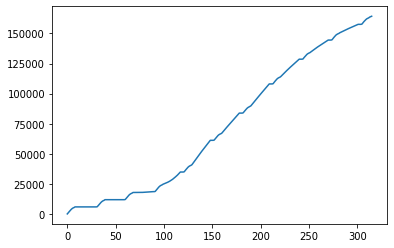

In [14]:
# Populate dataframe with cummulative distribution

cum_covid = pd.DataFrame(columns = ['date', 'count', 'cumulative'])

d = covid['DT_EVOLUCA'].min()
stop = covid['DT_EVOLUCA'].max()+timedelta(days=1)
i = 0

while d < stop:
  cum_covid.loc[i, 'date'] = d
  cum_covid.loc[i, 'count'] = covid.loc[covid['DT_EVOLUCA'] == d, 'DT_EVOLUCA'].count()
  d = d + timedelta(days=1)
  i = i + 1

cum_covid.loc[0, 'cumulative'] = cum_covid.loc[0, 'count']

for i in range(1,len(cum_covid)):
  cum_covid.loc[i, 'cumulative'] = cum_covid.loc[(i-1), 'cumulative'] + cum_covid.loc[i, 'count']

plt.plot(cum_covid['cumulative'].astype(float))

plt.show()

### Descriptive Statistics of Sample

In [15]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

data.loc[:,['pop', 'vote_share', 'covid', 'hdi', 'elderly']].astype(float).describe()


,pop,vote_share,covid,hdi,elderly
count,2180.0000,2180.0000,2180.0000,2180.0000,2180.0000
mean,43477.9055,-0.0895,1.9455,660.4188,40.8840
std,181413.0317,0.4921,2.9963,73.2188,66.1475
min,1410.0000,-4.1793,0.0647,418.0000,0.0000
25%,7265.7500,-0.2895,0.8802,600.0000,3.0438
50%,15042.0000,-0.0547,1.4299,669.0000,21.1557
75%,31808.2500,0.1629,2.2229,720.0000,52.6492
max,6747815.0000,1.4330,80.7941,847.0000,1241.8075


### Scatterplots

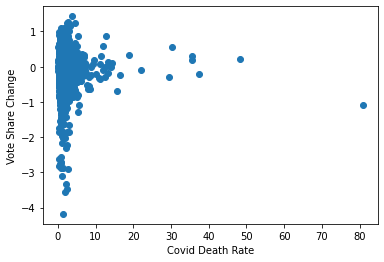

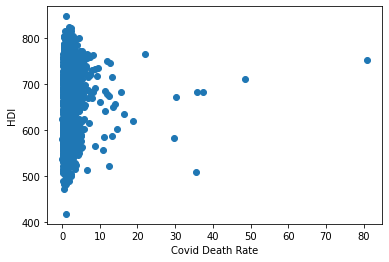

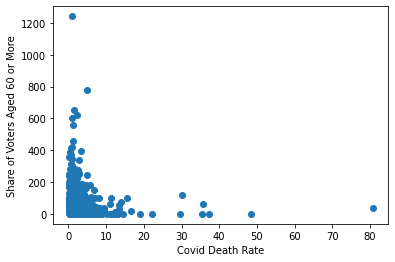

In [16]:
# Scatterplots

plt.scatter(data.covid, data.vote_share)
plt.xlabel('Covid Death Rate')
plt.ylabel('Vote Share Change')
plt.show()

plt.scatter(data.covid, data.hdi)
plt.xlabel('Covid Death Rate')
plt.ylabel('HDI')
plt.show()

plt.scatter(data.covid, data.elderly)
plt.xlabel('Covid Death Rate')
plt.ylabel('Share of Voters Aged 60 or More')
plt.show()

### Heatmap of covid cases in the sample by state

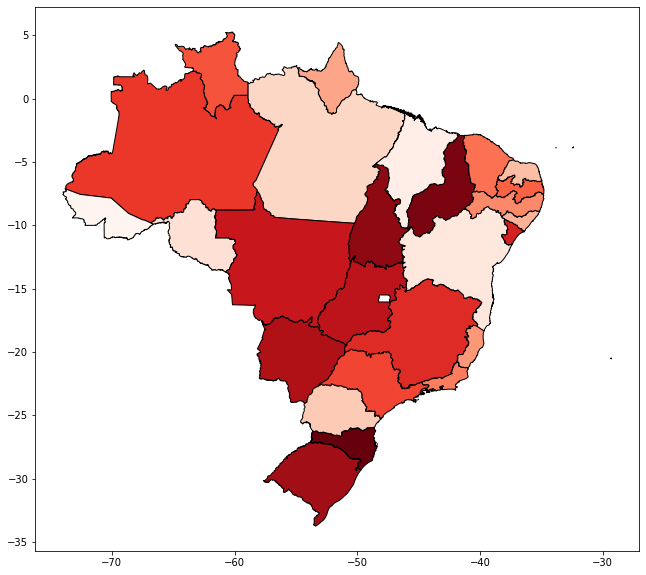

In [20]:
# source: https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585

# Map file can be found at https://www.ibge.gov.br/geociencias/downloads-geociencias.html, cartas e mapas > bases_cartograficas_continuas > bcim > versao 2016 > geopackage

info_st = gpd.read_file('/content/drive/MyDrive/Applied economic analysis/bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

# Dataframe with aggregate data by state

covid_st = pd.DataFrame(columns = ['state', 'covid'])

states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

covid_st.state = states

for s in states:
  covid_st.loc[covid_st['state'] == s, 'covid'] = data.loc[data['state'] == s, 'covid'].mean()

# Rename column to match on next step

info_st.rename({'sigla':'state'}, axis = 1, inplace = True)

# Add info_st to covid_st

covid_st = info_st.merge(covid_st, on = 'state', how = 'left')

# Plot map

covid_st.plot(column = 'covid', cmap = 'Reds', figsize = (16,10), edgecolor = 'black')


# Discussion

We will run our model on three subsets of the sample. First, we will use all the cities that fit in the model. Then, to check if there is any differences related to population size, we will filter our data, first taking only cities with over 25,000 inhabitants and then over 50,000.

## Full Sample

In [21]:
reg = pd.DataFrame()
reg['vote'] = data['vote_share'].astype(float)
reg['covid'] = data['covid'].astype(float)
reg['hdi'] = data['hdi'].astype(float)
reg['elder'] = data['elderly'].astype(float)
reg['ideol'] = data['party_index'].astype(float)
reg['pop'] = data['pop'].astype(float)

naive = ols("vote ~ covid", data = reg).fit()
controls = ols("vote ~ covid + hdi + elder", data = reg).fit()
ideol = ols("vote ~ covid + hdi + elder + ideol", data = reg, missing = 'drop').fit()

output1 = summary_col([naive,controls,ideol],stars=True, info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)),'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(output1)


            vote I    vote II    vote III 
------------------------------------------
Intercept -0.0895*** 0.2195**   0.1418    
          (0.0126)   (0.0998)   (0.1076)  
covid     0.0000     0.0005     0.0003    
          (0.0035)   (0.0035)   (0.0036)  
elder                -0.0003*   -0.0003*  
                     (0.0002)   (0.0002)  
hdi                  -0.0005*** -0.0004***
                     (0.0001)   (0.0001)  
ideol                           0.0050    
                                (0.0077)  
N         2180       2180       2107      
R2        0.00       0.00       0.00      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Cities Over 25,000 Inhabitants

In [22]:
reg = reg.loc[reg['pop'] > 25000]

naive2 = ols("vote ~ covid", data = reg).fit()
controls2 = ols("vote ~ covid + hdi + elder", data = reg).fit()
ideol2 = ols("vote ~ covid + hdi + elder + ideol", data = reg, missing = 'drop').fit()

output2 = summary_col([naive2,controls2,ideol2],stars=True, info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)),'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(output2)


            vote I   vote II  vote III
--------------------------------------
Intercept -0.1531*** 0.0333   -0.1350 
          (0.0429)   (0.2079) (0.2212)
covid     0.0215     0.0209   0.0346  
          (0.0258)   (0.0263) (0.0265)
elder                -0.0006  -0.0005 
                     (0.0005) (0.0005)
hdi                  -0.0002  -0.0002 
                     (0.0003) (0.0003)
ideol                         0.0182  
                              (0.0163)
N         712        712      689     
R2        0.00       0.00     0.01    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Cities Over 50,000 Inhabitants

In [23]:
reg = reg.loc[reg['pop'] > 50000]

naive3 = ols("vote ~ covid", data = reg).fit()
controls3 = ols("vote ~ covid + hdi + elder", data = reg).fit()
ideol3 = ols("vote ~ covid + hdi + elder + ideol", data = reg, missing = 'drop').fit()

output3 = summary_col([naive3,controls3,ideol3],stars=True, info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)),'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(output3)


            vote I    vote II    vote III 
------------------------------------------
Intercept -0.3267*** -0.2890    -0.5200   
          (0.0849)   (0.3816)   (0.3869)  
covid     0.1078**   0.1029**   0.1218**  
          (0.0490)   (0.0490)   (0.0484)  
elder                -0.0031*** -0.0032***
                     (0.0011)   (0.0011)  
hdi                  0.0001     0.0000    
                     (0.0005)   (0.0005)  
ideol                           0.0390    
                                (0.0267)  
N         331        331        323       
R2        0.01       0.04       0.05      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Conclusion

Overall, we did not found evidence that SARS-Covid death rate affects incumbent mayors vote share. The only statistically significant (5% confidence level) result in that regard was found when the sample was restricted to cities with 50,000 inhabitants or more. For that subset of the sample we find a quite counterintuitive result, namely that higher Covid mortality is associated with higher vote share for incumbents.

There are some reasons for why we find such a puzzling result. From an econometric perspective, there might be uncontrolled confounders, which would simultaneously increase both vote share of incumbents and Covid death rate, which in turn would result in the positive coefficient for Covid mortality, even though it has does not have a positive effect on the vote share of an incubent. Another explanation comes from a political science angle. Voters may not perceive mayors as responsible for Covid mortality, either by attributing blame to politicians on the State and Federal spheres or by framing as an 'Act of God'. If that is the case, a higher mortality rate could boost the 'Rallly-Around-the-Flag' phenomenon, benefiting incumbent mayors.


# References

Arceneaux, Kevin, and Robert M. Stein. "Who is held responsible when disaster strikes? The attribution of responsibility for a natural disaster in an urban election." Journal of Urban Affairs 28.1 (2006): 43-53.

Baum, Matthew A. "The constituent foundations of the rally-round-the-flag phenomenon." International Studies Quarterly 46.2 (2002): 263-298.

Bodet, Marc Andre, Melanee Thomas, and Charles Tessier. "Come hell or high water: An investigation of the effects of a natural disaster on a local election." Electoral Studies 43 (2016): 85-94.

De Vries, Catherine E., et al. "Crisis Signaling: How Italy's Coronavirus Lockdown Affected Incumbent Support in Other European Countries." Available at SSRN 3606149 (2020).

Ferraz, Claudio, and Frederico Finan. "Exposing corrupt politicians: the effects of Brazil's publicly released audits on electoral outcomes." The Quarterly journal of economics 123.2 (2008): 703-745.

Ferraz, Claudio, and Frederico Finan. "Electoral accountability and corruption: Evidence from the audits of local governments." American Economic Review 101.4 (2011): 1274-1311.

Giommoni, Tommaso, and Gabriel Loumeau. "Lockdown and voting behaviour: A natural experiment on postponed elections during the COVID-19 pandemic." Available at SSRN (2020).

Ponce, Daniela. "The impact of coronavirus in Brazil: politics and the pandemic." Nature Reviews Nephrology 16.9 (2020): 483-483.

Zucco, Cesar; Power, Timothy J., 2019, "Brazilian Legislative Surveys (Waves 1-8, 1990-2017)", https://doi.org/10.7910/DVN/ARYBJI, Harvard Dataverse, V2, UNF:6:OZ4b3ybYKksC255DkruPxg== [fileUNF]